In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

netcdf_index loaded.


In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
# figure output path:
figdir = 'figures/access-om2-01/MOM_Validation_ACCESS-OM2-01/'

import os
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [4]:
configuration = 'access-om2-01'

expts = cc.get_experiments(configuration)
display(expts)

['01deg_jra55v13_ryf8485_spinup1',
 '01deg_jra55v13_ryf8485_spinup2',
 '01deg_jra55v13_ryf8485_spinup3',
 '01deg_jra55v13_ryf8485_spinup4',
 '01deg_jra55v13_ryf8485_spinup5',
 '01deg_jra55v13_ryf8485_spinup6',
 '01deg_jra55v13_ryf9091_spinup1']

In [5]:
expt = '01deg_jra55v13_ryf8485_spinup6'
## Load SST from expt - last 12 outputs (TODO: would prefer to do this by year)
tmp = cc.get_nc_variable(expt, 'ocean.nc', 'temp',n=12, time_units = 'days since 1900-01-01').isel(st_ocean=0)
# accessom2_01_sst = tmp.sel(time=slice('1902-01','1902-12'))
accessom2_01_sst = tmp
accessom2_01_sst.shape

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=12), HTML(value='')))

(12, 2700, 3600)

In [6]:
configuration = 'mom01v5'

expts = cc.get_experiments(configuration)
display(expts)

['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_newbathy_JRA_runoff',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind']

In [7]:
expt = 'KDS75_newbathy_JRA'
## Load SST from expt - last 9 outputs (TODO: would prefer to do this by year)
tmp = cc.get_nc_variable(expt, 'ocean.nc', 'temp',n=9, time_units = 'days since 1900-01-01').isel(st_ocean=0)
old_mom_sst = tmp.sel(time=slice('1902-01','1902-12'))
old_mom_sst.shape

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=9), HTML(value='')))

(12, 2700, 3600)

In [8]:
expt = 'KDS75_newbathy_CORE'
## Load SST from expt - last 6 outputs (TODO: would prefer to do this by year)
new_mom_sst = cc.get_nc_variable(expt, 'ocean.nc', 'temp',n=6, time_units = 'days since 1900-01-01').isel(st_ocean=0)
new_mom_sst.shape

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=6), HTML(value='')))

(12, 2700, 3600)

In [9]:
expt = 'woa13/01'
## Load SST from expt - last 4 outputs (TODO: would prefer to do this by year)
obs_sst = cc.get_nc_variable('woa13/01', 'woa13_ts_\d+_mom01.nc', 'temp',time_units = 'days since 1900-01-01').isel(ZT=0)
obs_sst.shape

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=12), HTML(value='')))

(12, 2700, 3600)

In [10]:
# latitude: 5S-5N, longitude: 120E-80W
obs_sst_eq = obs_sst.sel(GRID_Y_T=slice(-5,5)).sel(GRID_X_T=slice(-240,-80))
m_obs_sst_eq = obs_sst_eq.mean('GRID_Y_T')
a_obs_sst_eq = np.ma.anom(m_obs_sst_eq,axis=0)
a_obs_sst_eq.shape
obs_lon_eq = obs_sst_eq.GRID_X_T
obs_lon_eq.shape

(1600,)

In [11]:
# latitude: 5S-5N, longitude: 120E-80W
accessom2_01_sst
accessom2_01_sst_eq = accessom2_01_sst.sel(yt_ocean=slice(-5,5)).sel(xt_ocean=slice(-240,-80))
m_accessom2_01_sst_eq = accessom2_01_sst_eq.mean('yt_ocean')
a_accessom2_01_sst_eq = np.ma.anom(m_accessom2_01_sst_eq,axis=0)
a_accessom2_01_sst_eq.shape
accessom2_01_lon_eq = accessom2_01_sst_eq.xt_ocean

In [12]:
# latitude: 5S-5N, longitude: 120E-80W
new_mom_sst_eq = new_mom_sst.sel(yt_ocean=slice(-5,5)).sel(xt_ocean=slice(-240,-80))
m_new_mom_sst_eq = new_mom_sst_eq.mean('yt_ocean')
a_new_mom_sst_eq = np.ma.anom(m_new_mom_sst_eq,axis=0)
a_new_mom_sst_eq.shape
new_mom_lon_eq = new_mom_sst_eq.xt_ocean

In [13]:
# latitude: 5S-5N, longitude: 120E-80W
old_mom_sst_eq = old_mom_sst.sel(yt_ocean=slice(-5,5)).sel(xt_ocean=slice(-240,-80))
m_old_mom_sst_eq = old_mom_sst_eq.mean('yt_ocean')
a_old_mom_sst_eq = np.ma.anom(m_old_mom_sst_eq,axis=0)
a_old_mom_sst_eq.shape
old_mom_lon_eq = old_mom_sst_eq.xt_ocean

Text(0.5,0.98,'SST along the Pacific equator ($^\\circ$C)')

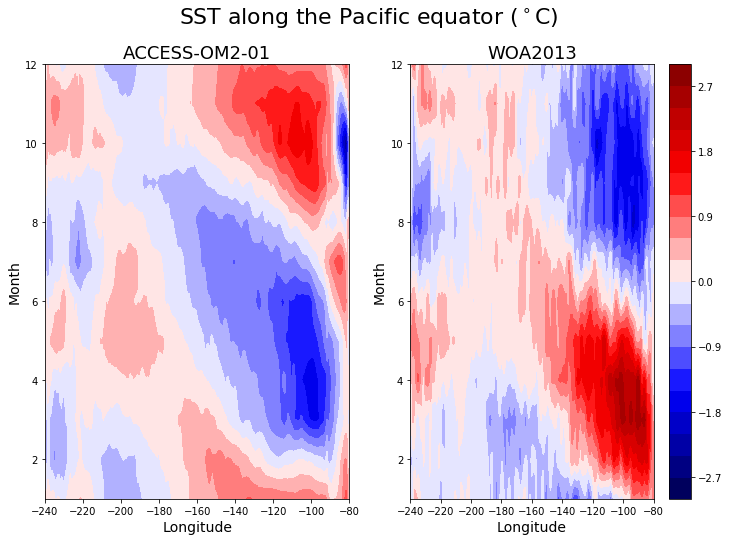

In [14]:
Tmax = 3; Tmin = -Tmax; delT = 0.3
clevels = np.arange(Tmin,Tmax+delT,delT)

fig_eqobs = plt.figure( figsize=(12,8) )
ax = fig_eqobs.add_subplot(121)
cax = ax.contourf( accessom2_01_lon_eq, np.arange(12)+1, a_accessom2_01_sst_eq, levels=clevels,  
               cmap=plt.cm.seismic )#cmap=plt.cm.jet)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Month', fontsize=14 )
#cbar = plt.colorbar(cax)
ax.set_title('ACCESS-OM2-01', fontsize=18)

ax = fig_eqobs.add_subplot(122)
cax = ax.contourf( obs_lon_eq, np.arange(12)+1, a_obs_sst_eq, levels=clevels,  
               cmap=plt.cm.seismic )#cmap=plt.cm.jet)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Month', fontsize=14 )
cbar = plt.colorbar(cax)
ax.set_title('WOA2013', fontsize=18)

fig_eqobs.suptitle('SST along the Pacific equator ($^\circ$C)', fontsize=22)
# savefigure('seasonal_cycle_eq.png')

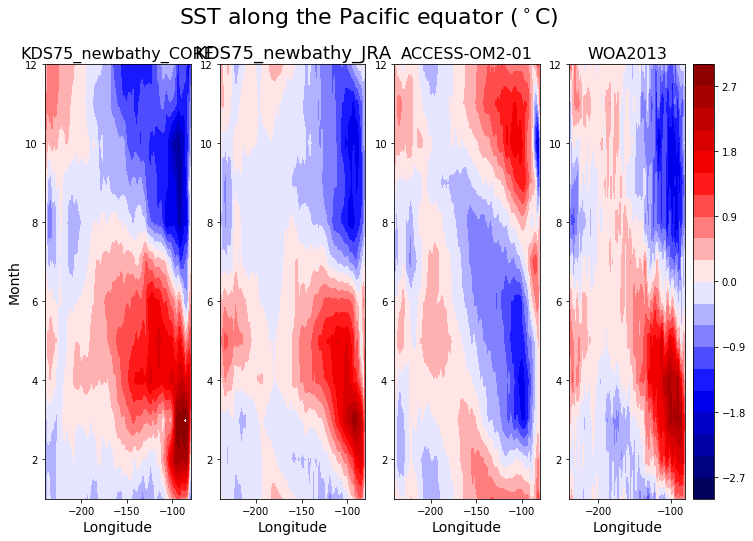

In [15]:
Tmax = 3; Tmin = -Tmax; delT = 0.3
clevels = np.arange(Tmin,Tmax+delT,delT)

fig_eqobs = plt.figure( figsize=(12,8) )
ax = fig_eqobs.add_subplot(141)
cax = ax.contourf( new_mom_lon_eq, np.arange(12)+1, a_new_mom_sst_eq, levels=clevels,  
               cmap=plt.cm.seismic )#cmap=plt.cm.jet)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Month', fontsize=14 )
#cbar = plt.colorbar(cax)
# ax.set_title('new bathymetry by CORE', fontsize=16)
ax.set_title('KDS75_newbathy_CORE', fontsize=16)

ax = fig_eqobs.add_subplot(142)
cax = ax.contourf( old_mom_lon_eq, np.arange(12)+1, a_old_mom_sst_eq, levels=clevels,
               cmap=plt.cm.seismic )#cmap=plt.cm.jet)

ax.set_xlabel('Longitude', fontsize=14)
# ax.set_ylabel('Month', fontsize=14 )
#cbar = plt.colorbar(cax)
# ax.set_title('new bathymetry by JRA', fontsize=18)
ax.set_title('KDS75_newbathy_JRA', fontsize=18)

ax = fig_eqobs.add_subplot(143)
cax = ax.contourf( accessom2_01_lon_eq, np.arange(12)+1, a_accessom2_01_sst_eq, levels=clevels,  
               cmap=plt.cm.seismic )#cmap=plt.cm.jet)
ax.set_xlabel('Longitude', fontsize=14)
# ax.set_ylabel('Month', fontsize=14 )
# cbar = plt.colorbar(cax)
ax.set_title('ACCESS-OM2-01', fontsize=16)

#fig_eqobs = plt.figure( figsize=(10,8) )
ax = fig_eqobs.add_subplot(144)
cax = ax.contourf( obs_lon_eq, np.arange(12)+1, a_obs_sst_eq, levels=clevels,  
               cmap=plt.cm.seismic )#cmap=plt.cm.jet)
ax.set_xlabel('Longitude', fontsize=14)
# ax.set_ylabel('Month', fontsize=14 )
cbar = plt.colorbar(cax)
ax.set_title('WOA2013', fontsize=16)

fig_eqobs.suptitle('SST along the Pacific equator ($^\circ$C)', fontsize=22)
plt.savefig('seasonal_cycle_eq.png')

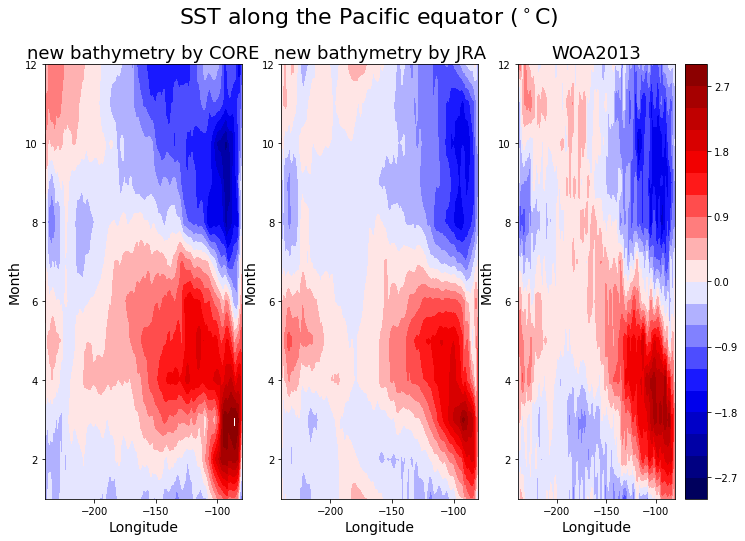

In [16]:
Tmax = 3; Tmin = -Tmax; delT = 0.3
clevels = np.arange(Tmin,Tmax+delT,delT)

fig_eqobs = plt.figure( figsize=(12,8) )
ax = fig_eqobs.add_subplot(131)
cax = ax.contourf( new_mom_lon_eq, np.arange(12)+1, a_new_mom_sst_eq, levels=clevels,  
               cmap=plt.cm.seismic )#cmap=plt.cm.jet)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Month', fontsize=14 )
#cbar = plt.colorbar(cax)
ax.set_title('new bathymetry by CORE', fontsize=18)

ax = fig_eqobs.add_subplot(132)
cax = ax.contourf( old_mom_lon_eq, np.arange(12)+1, a_old_mom_sst_eq, levels=clevels,
               cmap=plt.cm.seismic )#cmap=plt.cm.jet)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Month', fontsize=14 )
#cbar = plt.colorbar(cax)
ax.set_title('new bathymetry by JRA', fontsize=18)

#fig_eqobs = plt.figure( figsize=(10,8) )
ax = fig_eqobs.add_subplot(133)
cax = ax.contourf( obs_lon_eq, np.arange(12)+1, a_obs_sst_eq, levels=clevels,  
               cmap=plt.cm.seismic )#cmap=plt.cm.jet)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Month', fontsize=14 )
cbar = plt.colorbar(cax)
ax.set_title('WOA2013', fontsize=18)

fig_eqobs.suptitle('SST along the Pacific equator ($^\circ$C)', fontsize=22)
plt.savefig('seasonal_cycle.png')